In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings as w
w.filterwarnings('ignore')

In [3]:
# Clustering 수 지정
K = 20

In [4]:
ds = pd.read_csv('../data/Spot_2021_07.csv')
X = ds.iloc[:,[5,6]].values
print(X)

[[ 905825 1501675]
 [ 905525 1500975]
 [ 907175 1501675]
 ...
 [ 946725 1493425]
 [ 947325 1496725]
 [ 947475 1497575]]


In [21]:
from sklearn.cluster import KMeans

In [29]:
kmeans = KMeans(n_clusters=K,init='k-means++',random_state=0).fit(X)
# y_kmeans = kmeans.fit_predict(x)
kmeans

KMeans(n_clusters=20, random_state=0)

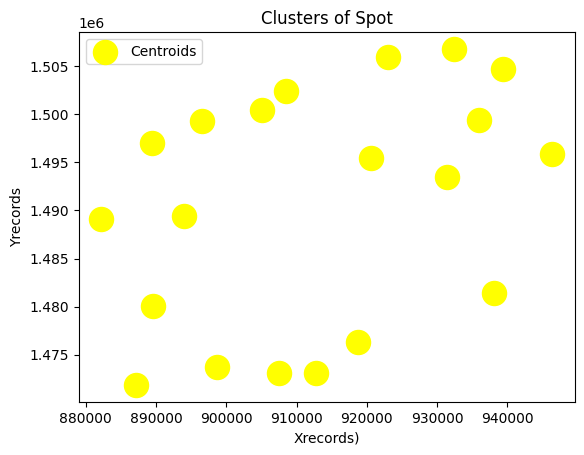

In [27]:
# plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100, c='red',label='Cluster 1')
# plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100, c='blue',label='Cluster 2')
# plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100, c='green',label='Cluster 3')
# plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100, c='black',label='Cluster 4')
# plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100, c='pink',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Spot')
plt.xlabel('Xrecords)')
plt.ylabel('Yrecords')
plt.legend()
plt.show()


In [28]:
centroids_x = kmeans.cluster_centers_[:, 0]
centroids_y = kmeans.cluster_centers_[:, 1]
for i in range(len(centroids_x)):
    print(f"Centroid {i+1}: ({centroids_x[i]}, {centroids_y[i]})")

Centroid 1: (938106.25, 1481406.25)
Centroid 2: (893953.125, 1489409.375)
Centroid 3: (908458.3333333334, 1502445.138888889)
Centroid 4: (946399.4897959183, 1495885.2040816327)
Centroid 5: (898751.7857142857, 1473706.25)
Centroid 6: (918747.7272727273, 1476288.6363636365)
Centroid 7: (932391.6666666666, 1506775.0)
Centroid 8: (882246.052631579, 1489094.7368421052)
Centroid 9: (887205.9523809524, 1471865.4761904762)
Centroid 10: (931414.2857142857, 1493489.2857142857)
Centroid 11: (896580.8823529412, 1499286.7647058824)
Centroid 12: (889486.1111111111, 1496965.7407407407)
Centroid 13: (912750.0, 1473150.0)
Centroid 14: (889535.9375, 1480046.875)
Centroid 15: (905145.8333333334, 1500473.611111111)
Centroid 16: (923050.0, 1505966.6666666667)
Centroid 17: (939435.0, 1504665.0)
Centroid 18: (936025.0, 1499410.7142857143)
Centroid 19: (920535.0, 1495440.0)
Centroid 20: (907452.7777777778, 1473091.6666666667)


In [11]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['x', 'y'])
centroids

,x,y
0,938106.250000,1.481406e+06
1,893953.125000,1.489409e+06
2,908458.333333,1.502445e+06
3,946399.489796,1.495885e+06
4,898751.785714,1.473706e+06
5,918747.727273,1.476289e+06
6,932391.666667,1.506775e+06
7,882246.052632,1.489095e+06
8,887205.952381,1.471865e+06
9,931414.285714,1.493489e+06


In [12]:
from pyproj import Transformer

# 원래 좌표계 (EPSG:5179)와 변환할 좌표계 (EPSG:4326)의 Transformer 객체 생성
transformer = Transformer.from_crs("EPSG:5179", "EPSG:4326", always_xy=True)

# # CSV 파일 로드
# df = pd.read_csv(f'../data/2021_07_POI_{K}.csv')

# 좌표 변환
centroids[['lon', 'lat']] = centroids.apply(lambda row: transformer.transform(row['x'], row['y']), axis=1).apply(pd.Series)

# 변환된 좌표로 업데이트된 CSV 파일 저장
centroids.to_csv(f'../data/2021_07_POI_{K}_transformed.csv', index=False)